# Mathematical Statistics - Recitation 2

### 9th February 2018

## Bootstrapping

### Bootstrap Variance Estimation - Wasserman page 109

1. Draw $X^{*}_{1}$, $X^{*}_{2}$, ... , $X^{*}_{n}$ ~ $\hat{F_n}$

2. Compute $T^{*}_{n}$ = $g(X^{*}_{1}$, $X^{*}_{2}$, ... , $X^{*}_{n})$

3. Repeat steps 1 and 2, B times to get  $T^{*}_{n,1}$, ... , $T^{*}_{n,B}$

4. Let $v_{boot}$ = $\frac{1}{B}$ $\sum_{b=1}^{B}$ ($T^{*}_{n,b}$ - $\frac{1}{B}$  $\sum_{r=1}^{B}$ $T^{*}_{n,r})^{2}$ 




### Example W 8.6.1

In [1]:
# Package imports
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
%matplotlib inline


In [2]:
import seaborn as sns
sns.set(color_codes=True)

##### Specify / load data

In [3]:
lsatScores = np.array([576, 635, 558, 578, 666, 580, 555, 661, 651, 605, 653, 575, 545, 572, 594])
gpaScores = np.array([3.39, 3.30, 2.81, 3.03, 3.44, 3.07, 3.00, 3.43, 3.36, 3.13, 3.12, 2.74, 2.76, 2.88, 3.96])

##### Plug-in estimate of the correlation coefficient

Plug in estimate is the sample correlation which we can calculate using numpy or scipy.stats

In [4]:
# Correlation coefficient

np.corrcoef(lsatScores, gpaScores)

#Prints a matrix with correlations


array([[ 1.        ,  0.54591892],
       [ 0.54591892,  1.        ]])

In [5]:
# Handy tip on how to see the help file on functions - type the function followed by a '?' question mark

scipy.stats.pearsonr?

## also, if you're unsure a function name use can use 'tab' to provide some autofill options
## try typing 'np.corr' then press tab (once you have the function, you can press shift + tab also which is helpful)


In [6]:
scipy.stats.pearsonr(lsatScores, gpaScores)

# prints correlation coefficient and p-value (check what test is being performed)


(0.54591891617958854, 0.035271615127326676)

In [7]:
scipy.stats.pearsonr(lsatScores, gpaScores)[0]

# prints only correlation coefficient


0.54591891617958854

##### Estimate standard error using boostrap

First use the steps above to calculate $v_{boot}$. Note the function g above in this case is the formula for calculating correlation coefficient.

In [8]:
numberObservations = len(lsatScores)
numberObservations

15

In [9]:
observationIDs = range(numberObservations)
observationIDs

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14]

Let's use the np.choose function to take a simple random sample of our observations, and recall we are sampling with replacement.

In [10]:
# set seed for replicability of random sampling
np.random.seed(999)


# this chooses a sample from the observation IDs with replacement
resampleObsIDs = np.random.choice(observationIDs, size=numberObservations, replace=True)
resampleObsIDs

array([ 0, 12,  5,  1,  8,  1, 11,  9,  3,  0, 13,  5,  8,  8,  0])

In [11]:
resampleLsatScores = lsatScores[[resampleObsIDs]]
resampleGpaScores = gpaScores[[resampleObsIDs]]
resampleLsatScores, resampleGpaScores

(array([576, 545, 580, 635, 651, 635, 575, 605, 578, 576, 572, 580, 651,
        651, 576]),
 array([ 3.39,  2.76,  3.07,  3.3 ,  3.36,  3.3 ,  2.74,  3.13,  3.03,
         3.39,  2.88,  3.07,  3.36,  3.36,  3.39]))

In [12]:

## Calculate correlation of resampled GPA and LSAT scores

resampledCorrel = scipy.stats.pearsonr(resampleLsatScores, resampleGpaScores)[0]

actualSampleCorrel = scipy.stats.pearsonr(lsatScores, gpaScores)[0]

resampledCorrel, actualSampleCorrel

# notice slight differences between resampled correlation and actual Sample correlation


(0.6064015312680342, 0.54591891617958854)

### Create the loop to bring this all together

We'll resample 1,000 times to calculate a variance of the resampled correlation coefficient

In [13]:
sampB = 1000

In [14]:
statStore = []

for i in range(sampB):
    resampleObsIDs = np.random.choice(observationIDs, size=numberObservations, replace=True)
    resampleLsatScores = lsatScores[[resampleObsIDs]]
    resampleGpaScores = gpaScores[[resampleObsIDs]]
    
    resampledCorrel = scipy.stats.pearsonr(resampleLsatScores, resampleGpaScores)[0]

    statStore.append(resampledCorrel)
    

In [15]:
vBoot = np.var(statStore)
vBoot

0.037910013450373953

In [16]:
stdDevBoot = np.sqrt(vBoot)
stdDevBoot

0.19470493946064632

In [17]:
zStat = 1.96

LowerEst = actualSampleCorrel - zStat * stdDevBoot
UpperEst = actualSampleCorrel + zStat * stdDevBoot

print("The NORMAL confidence interval is given by, " +
      "Lower: {} and Upper: {}.".format(round(LowerEst,4), round(UpperEst,4))) 



The NORMAL confidence interval is given by, Lower: 0.1643 and Upper: 0.9275.


*For pivotal and percentile intervals, we need to order/sort the observations.*

In [18]:
statScoreOrdered = np.sort(statStore)

##### Pivotal confidence interval (Wasserman page 111)

In [19]:
lowerPivotal = 2 * np.average(statScoreOrdered) - 0.5 * (statScoreOrdered[974] + statScoreOrdered[975])
upperPivotal = 2 * np.average(statScoreOrdered) - 0.5 * (statScoreOrdered[24] + statScoreOrdered[25])
print("The PIVOTAL confidence interval is given by, " +
      "Lower: {} and Upper: {}.".format(round(lowerPivotal,4), round(upperPivotal,4))) 

The PIVOTAL confidence interval is given by, Lower: 0.2252 and Upper: 0.9307.


##### Percentile method

In [20]:
statScoreOrdered[0:10]

array([-0.13922354,  0.01381625,  0.04437701,  0.04801405,  0.12006452,
        0.14332058,  0.14962186,  0.15429208,  0.16790496,  0.17124794])

 We have 1000 observations. To obtain a 95% interval about the center.

In [21]:
LowerPercentile = 0.5 * (statScoreOrdered[24] + statScoreOrdered[25])
UpperPercentile = 0.5 * (statScoreOrdered[974] + statScoreOrdered[975])

print("The PERCENTILE interval is given by, " +
      "Lower: {} and Upper: {}.".format(round(LowerPercentile,4), round(UpperPercentile,4))) 


The PERCENTILE interval is given by, Lower: 0.2364 and Upper: 0.9418.


In [22]:
## What if we weren't so precise.. by averaging 24th and 25th observation?
statScoreOrdered[24], statScoreOrdered[974]

## We get approximately the same answer. It's a little crude, but may be more practical

(0.23592495784691689, 0.94181063396730325)

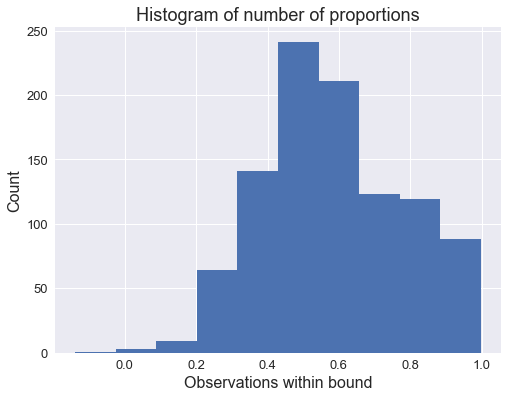

In [23]:
plt.figure(figsize=(8,6))
plt.hist(statScoreOrdered);
plt.title('Histogram of number of proportions', fontsize = 18)
plt.xlabel('Observations within bound', fontsize = 16)
plt.ylabel('Count', fontsize = 16)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.legend(fontsize = 14);

## Exponential families

We are bringing a lot together here. 

A **sufficient statistic** is a statistic that contains all the information in the data. Formally you can see the definition W 9.32 Definition page 137.


A statistic $T$ is **minimally sufficient** if: 

(i) it is sufficient; and
(ii) it is a function of every other sufficient statistic

#### Definition of exponential families

In practice a lot of the distributions we commonly use are part of this family. ***Although not all***

##### One-parameter exponential family

We say that {$f(x;\theta): \theta \in \Theta $} is a **one-parameter exponential family** if there are functions $B(\theta)$, $T(\theta$), $\eta(\theta)$ and $h(x)$ such that:

$f(x;\theta)$ = $h(x)$ $e^{\eta(\theta) T(x) - B(\theta)}$



### Class exercise

Show that the following distribution are members of the exponential family and state $B(\theta)$, $T(\theta$), $\eta(\theta)$ and $h(x)$ in each case.

(We worked through in class)